<a href="https://colab.research.google.com/github/PedroFerreiraBento/Bacharelado-Ciencia-de-Dados/blob/main/1%20-%20Data%20Science%20Analyst%5CModule%201%5CPractice%5CPratice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to data science

## Module 1 - Practice

### Abstract

Pretend an e-commerce company is facing issues with the delivery of its products to different regions in Brazil. The company wants to develop a linear regression model that can predict the number of days for delivery based on the shipping cost, taking into account the particularities of each region.

### Objective

The objective is to reduce delivery time and improve customer satisfaction. Based on the available data, the company's data science team needs to develop a model that can be used to estimate the number of days for product delivery based on the shipping cost and destination region.

The linear regression model should be applied only to the Southeast region and take into account the shipping cost and the number of delivery days. Additionally, the model should accurately predict the number of delivery days for different shipping costs in this region, enabling the company to make more precise and informed decisions regarding the logistics management of its products.

### Libraries imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Dataset import e treatment

In [4]:
freight = pd.read_csv("/content/frete_dias_entrega.csv", sep=";")
freight

,Região,Valor do Frete,Dias para Entrega
0,Norte,49.59,20.0
1,Norte,117.57,3.0
2,Norte,98.15,7.0
3,Norte,96.98,6.0
4,Norte,123.00,6.0
...,...,...,...
495,Centro-Oeste,88.72,7.0
496,Centro-Oeste,66.35,11.0
497,Centro-Oeste,41.56,22.0
498,Centro-Oeste,73.28,9.0


In [5]:
# Select only records about southeast ('Sudeste') region ('Região')
southeast_freight = freight.loc[freight["Região"] == "Sudeste"]
southeast_freight

,Região,Valor do Frete,Dias para Entrega
200,Sudeste,106.04,8.0
201,Sudeste,103.51,1.0
202,Sudeste,82.69,13.0
203,Sudeste,108.23,4.0
204,Sudeste,116.11,1.0
...,...,...,...
295,Sudeste,84.04,5.0
296,Sudeste,108.20,4.0
297,Sudeste,96.42,4.0
298,Sudeste,115.34,5.0


### Exploratory data analysis

In [6]:
# Generic data
southeast_freight.tail()

,Região,Valor do Frete,Dias para Entrega
295,Sudeste,84.04,5.0
296,Sudeste,108.20,4.0
297,Sudeste,96.42,4.0
298,Sudeste,115.34,5.0
299,Sudeste,70.30,13.0


In [7]:
# Generating statistical data
southeast_freight.describe()

,Valor do Frete,Dias para Entrega
count,100.000000,100.000000
mean,87.186500,8.120000
std,22.707019,5.733615
min,19.170000,1.000000
25%,73.017500,3.750000
50%,89.240000,7.000000
75%,106.190000,12.000000
max,119.570000,26.000000


In [8]:
# Checking for missing values
southeast_freight.isna().sum()

Região               0
Valor do Frete       0
Dias para Entrega    0
dtype: int64

In [9]:
# Checking the data format
southeast_freight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 200 to 299
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Região             100 non-null    object 
 1   Valor do Frete     100 non-null    float64
 2   Dias para Entrega  100 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


### Data correlation analysis
- Positive correlation: Both variables increase or decrease together, that is, they have a direct relationship.
- Negative correlation: Both variables increase or decrease in opposite directions, that is, they have an indirect relationship.

In [10]:
# Find the columns correlations
southeast_freight.corr(numeric_only=True)

,Valor do Frete,Dias para Entrega
Valor do Frete,1.000000,-0.900648
Dias para Entrega,-0.900648,1.000000


<Axes: >

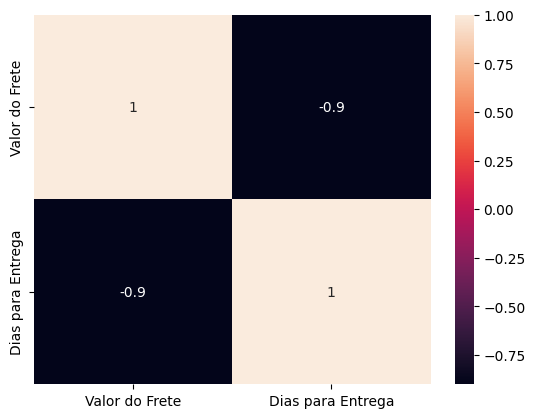

In [11]:
# Correlation heat map graphic
sns.heatmap(southeast_freight.corr(numeric_only=True), annot=True)

### Data prepare
Preparation of data that will be used in the Linear Regression model. It must be performed so that the data is in the format that the algorithm requests as input.

**Creation of the independent variable - X** 

In [12]:
X = southeast_freight.loc[:, "Valor do Frete"].values
X = X.reshape(-1, 1)
X

array([[106.04],
       [103.51],
       [ 82.69],
       [108.23],
       [116.11],
       [116.26],
       [ 92.89],
       [116.46],
       [111.23],
       [ 48.95],
       [ 41.5 ],
       [ 78.98],
       [102.68],
       [ 63.54],
       [ 92.67],
       [ 49.36],
       [ 59.45],
       [ 89.51],
       [ 91.84],
       [ 70.88],
       [115.21],
       [ 60.42],
       [119.57],
       [ 66.  ],
       [118.7 ],
       [ 37.7 ],
       [ 88.29],
       [ 56.9 ],
       [ 87.75],
       [101.31],
       [ 82.85],
       [ 65.84],
       [ 96.94],
       [ 68.87],
       [ 33.47],
       [ 60.72],
       [100.98],
       [106.64],
       [109.98],
       [ 84.89],
       [ 76.32],
       [100.53],
       [117.47],
       [ 86.73],
       [115.8 ],
       [ 69.96],
       [ 98.35],
       [ 84.64],
       [118.49],
       [ 94.12],
       [ 89.33],
       [ 82.59],
       [100.33],
       [117.05],
       [ 85.69],
       [ 59.6 ],
       [108.99],
       [ 95.84],
       [118.57

**Creation of the dependent variable - y**

In [31]:
y = southeast_freight.loc[:, "Dias para Entrega"].values
y

array([ 8.,  1., 13.,  4.,  1.,  2., 11.,  1.,  4., 15., 18.,  7.,  6.,
       17.,  9., 20., 16.,  3.,  5., 11.,  2., 18.,  3., 13.,  1., 17.,
        5., 16.,  7.,  4., 10., 15.,  5.,  9., 23., 12.,  9.,  7.,  1.,
        7.,  6.,  4.,  1.,  8.,  1., 13.,  9.,  6.,  2., 11., 11., 10.,
        8.,  1., 13., 16.,  1.,  5.,  4., 19., 12., 10., 13., 12.,  2.,
        3.,  4.,  7.,  8.,  3.,  1., 16.,  2.,  1.,  2.,  5., 15.,  2.,
        8., 11.,  5.,  1., 26.,  4.,  1., 10.,  7., 10.,  7., 13., 11.,
       12., 16., 14.,  2.,  5.,  4.,  4.,  5., 13.])

### Machine Learning model creation - Linear Regression

In [30]:
# Model creation
days_by_freight = LinearRegression()

In [34]:
# Model training
days_by_freight.fit(X, y)

LinearRegression()

In [16]:
# Compute the alfa constant - intercept
days_by_freight.intercept_

27.94772254633564

In [17]:
# Compute the angular constant of the line - coef
days_by_freight.coef_

array([-0.22741735])

### Data visualization

In [18]:
# Graphic 1 - Data without model
graphic = px.scatter(x=X.ravel(), y=y)
graphic.show()

In [35]:
# Graphic 2 - Linear regression model
predict = days_by_freight.predict(X)

grafico = px.scatter(x=X.ravel(), y=y)
grafico.add_scatter(x=X.ravel(), y=predict, name="Predict")
grafico.show()

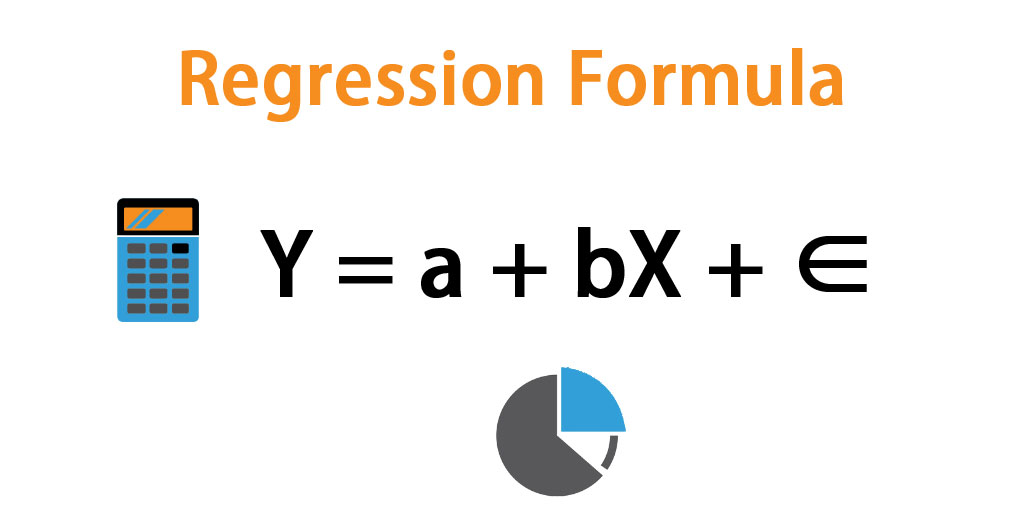

In [24]:
# Predicting with the formula
alfa = days_by_freight.intercept_
beta = days_by_freight.coef_
xi = 52.98 # Independent parameter - freight
yi = (alfa + beta * xi)

print('Formula:', yi)

# Predicting with model method
print("Method .predict:", days_by_freight.predict([[xi]]))

Formula: [15.89915149]
Method .predict: [15.89915149]


### Model validation

In [28]:
# Model accuracy
days_by_freight.score(X, y)

0.8111671052762233

In [36]:
# Absolute error - (Mean error) 
mean_absolute_error(y, predict)

2.091861170350245

In [37]:
# Square error - (Punishes bigger errors)
mean_squared_error(y, predict)

6.145679858522149

In [38]:
# Root square error - (Reduce outliers)
np.sqrt(mean_squared_error(y, predict))

2.479048175917957

## Questions to answear

### 1 - What is the mean price for the freight value variable?

In [40]:
southeast_freight['Valor do Frete'].mean()

87.1865

### 2 - Is there some missing value in dataset?

In [41]:
southeast_freight.isna().sum()

Região               0
Valor do Frete       0
Dias para Entrega    0
dtype: int64

### 3 - Is there a correlation between dataset variables?

In [42]:
southeast_freight.corr(numeric_only=True)

,Valor do Frete,Dias para Entrega
Valor do Frete,1.000000,-0.900648
Dias para Entrega,-0.900648,1.000000


### 4 - Whats is the expected delivery days for an item if shipping costs R$ 118,00? Use the function 'round' to get the result.

In [47]:
round(days_by_freight.predict([[118]])[0])

1

### 5 - What is the difference between the predicted value and the actual value for the R$37,70 freight?

In [53]:
predicted_value = days_by_freight.predict([[37.70]])[0]
actual_value = southeast_freight.loc[southeast_freight['Valor do Frete'] == 37.70, 'Dias para Entrega'].values[0]

predicted_value - actual_value

2.3740885548707524

### 6 - How many days are predicted for a R$52,98 freight? Use the funcion 'round'

In [54]:
round(days_by_freight.predict([[52.98]])[0])

16

### 7 - What is the generated model score?

In [57]:
days_by_freight.score(X, y)

0.8111671052762233